In [1]:
import numpy
import pandas as pd
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense, Activation, Embedding, LSTM
from tensorflow.keras.models import Sequential

df=pd.read_csv('F:\\Analysis_seq_Label_F.csv')
df=df.set_index('userid')
df.head()
numpy.random.seed(7)
df=df.reset_index()

In [2]:
df['map_name_sequence']= [ [int(s) for s in l[0].split(',')] for l in df[['map_name_sequence']].values.tolist()] 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['map_name_sequence'].values, df['active_status'].values, test_size=0.3, random_state=0) # 70% training and 30% test
max_length = 20
X_train = sequence.pad_sequences(X_train, maxlen=max_length,padding='post')
X_test = sequence.pad_sequences(X_test, maxlen=max_length,padding='post')

In [3]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

Using TensorFlow backend.


[(0, 2999182), (1, 2999182), (2, 2999182)]


In [4]:
from keras import backend as K
from keras.callbacks import TensorBoard

class LRTensorBoard(TensorBoard):
    def __init__(self, log_dir, **kwargs):  # add other arguments to __init__ if you need
        super().__init__(log_dir=log_dir, **kwargs)

    def on_epoch_end(self, epoch, logs=None):
        logs.update({'lr': K.eval(self.model.optimizer.lr)})
        super().on_epoch_end(epoch, logs)

In [14]:
from tensorflow.python.keras import backend as k
from tensorflow.python.keras.layers import Input, Dense,Bidirectional,Dropout
from tensorflow.python.keras import regularizers
from tensorflow.keras.models import Model
from keras_tqdm import TQDMNotebookCallback
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from time import time

loss_callback = ModelCheckpoint('F:\\LTD_SEQ\\Model1451215_loss.hdf5', monitor='loss', verbose=0, save_best_only=True, mode='auto')
acc_callback = ModelCheckpoint('F:\\LTD_SEQ\\Model1451215_accuracy.hdf5', monitor='accuracy', verbose=0, save_best_only=True, mode='auto')
LR=LRTensorBoard(log_dir="F:\\LTD_SEQ\\log\\{}".format(time()))

x_input = Input(shape=(20,))

emb = Embedding(64, 128, input_length=max_length)(x_input)
bi_rnn = Bidirectional(LSTM(64, kernel_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))(emb)
x = Dropout(0.3)(bi_rnn)
# softmax classifier
#prev_model = load_model('/home/nkadmin/Checkpoint/weights.hf5')

x_output = Dense(1000, activation='softmax')(x)
model1 = Model(inputs=x_input, outputs=x_output)
#model1.add(prev_model)
tensorboard= TensorBoard(log_dir="F:\\LTD_SEQ\\log/{}".format(time()))
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy','mse', 'mae', 'mape'])
print(model1.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=====
input_4 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 20, 128)           8192      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              129000    
=====
Total params: 236,008
Trainable params: 236,008
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
from tensorflow.python.keras import backend as k
from tensorflow.python.keras.layers import Input, Dense,Bidirectional,Dropout
from tensorflow.python.keras import regularizers
from tensorflow.keras.models import Model
from keras_tqdm import TQDMNotebookCallback
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from time import time

loss_callback = ModelCheckpoint('F:\\LTD_SEQ\\Model1451215_loss.hdf5', monitor='loss', verbose=0, save_best_only=True, mode='auto')
acc_callback = ModelCheckpoint('F:\\LTD_SEQ\\Model1451215_accuracy.hdf5', monitor='accuracy', verbose=0, save_best_only=True, mode='auto')
#LR=LRTensorBoard(log_dir="F:\\LTD_SEQ\\log\\{}".format(time()))

x_input = Input(shape=(20,))

emb = Embedding(64, 128, input_length=20)(x_input)
bi_rnn = Bidirectional(LSTM(64, kernel_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))(emb)
x = Dropout(0.3)(bi_rnn)
# softmax classifier
#prev_model = load_model('/home/nkadmin/Checkpoint/weights.hf5')

x_output = Dense(1000, activation='softmax')(x)
model1 = Model(inputs=x_input, outputs=x_output)
#model1.add(prev_model)
tensorboard= TensorBoard(log_dir="F:\\LTD_SEQ\\log/{}".format(time()))
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy','mse', 'mae', 'mape'])
print(model1.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 20, 128)           8192      
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1000)              129000    
Total params: 236,008
Trainable params: 236,008
Non-trainable params: 0
_________________________________________________________________
None


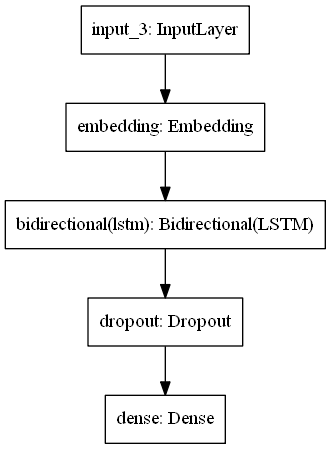

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model1, to_file='model.png')

In [18]:
history= model1.fit(X_resampled, y_resampled, validation_data=(X_test, y_test), epochs=3, batch_size=1024,verbose=0, callbacks=[TQDMNotebookCallback(),loss_callback,acc_callback,LR])

In [20]:
loss_callback = ModelCheckpoint('F:\\LTD_SEQ\\Model1451215_loss.hdf5', monitor='loss', verbose=0, save_best_only=True, mode='auto')
acc_callback = ModelCheckpoint('F:\\LTD_SEQ\\Model1451215_accuracy.hdf5', monitor='accuracy', verbose=0, save_best_only=True, mode='auto')
history= model1.fit(X_resampled, y_resampled, validation_data=(X_test, y_test), epochs=3, batch_size=1024,verbose=0, callbacks=[TQDMNotebookCallback(),loss_callback,acc_callback,LR])

In [21]:
loss_callback = ModelCheckpoint('F:\\LTD_SEQ\\Model1451215_loss.hdf5', monitor='loss', verbose=0, save_best_only=True, mode='auto')
acc_callback = ModelCheckpoint('F:\\LTD_SEQ\\Model1451215_accuracy.hdf5', monitor='accuracy', verbose=0, save_best_only=True, mode='auto')
history= model1.fit(X_resampled, y_resampled, validation_data=(X_test, y_test), epochs=3, batch_size=1024,verbose=0, callbacks=[TQDMNotebookCallback(),loss_callback,acc_callback,LR])

In [22]:
loss_callback = ModelCheckpoint('F:\\LTD_SEQ\\Model1451215_loss.hdf5', monitor='loss', verbose=0, save_best_only=True, mode='auto')
acc_callback = ModelCheckpoint('F:\\LTD_SEQ\\Model1451215_accuracy.hdf5', monitor='accuracy', verbose=0, save_best_only=True, mode='auto')
history= model1.fit(X_resampled, y_resampled, validation_data=(X_test, y_test), epochs=3, batch_size=1024,verbose=0, callbacks=[TQDMNotebookCallback(),loss_callback,acc_callback,LR])

In [23]:
model1.save('F:\\LTD_SEQ\\ModelSAve.hdf5')


In [24]:
loaded_model=load_model('F:\\LTD_SEQ\\ModelSAve.hdf5')
print(loaded_model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=====
input_4 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 20, 128)           8192      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              129000    
=====
Total params: 236,008
Trainable params: 236,008
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
X_train[:1001]
y_train[:1001]

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [63]:
y_pred=loaded_model.predict(X_resampled[:100001])

In [49]:
score=loaded_model.evaluate(X_train[:1001],y_train[:1001],batch_size=32)

1001/1 [] - 0s 275us/sample - loss: 0.9976 - accuracy: 0.6763 - mse: 3.8547 - mae: 1.9351 - mape: 25072.4707


In [64]:
import numpy as np
y_pred_bool = np.argmax(y_pred, axis=1)

In [67]:
y_pred_bool[:1000]

array([2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2,
       2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_resampled[:1001],y_pred)


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_resampled[:100001], y_pred_bool))

              precision    recall  f1-score   support

           0       0.05      0.25      0.09      3721
           1       0.02      0.12      0.03      1869
           2       0.95      0.72      0.82     94411

    accuracy                           0.69    100001
   macro avg       0.34      0.36      0.31    100001
weighted avg       0.90      0.69      0.78    100001



In [5]:
def residual_block(data, filters, d_rate):
    """_data: input
      _filters: convolution filters
      _d_rate: dilation rate
      """
    shortcut = data
    bn1 = BatchNormalization()(data)
    act1 = Activation('relu')(bn1)
    conv1 = Conv1D(filters, 1, dilation_rate=d_rate, padding='same', kernel_regularizer=l2(0.001))(act1)
    #bottleneck convolution
    bn2 = BatchNormalization()(conv1)
    act2 = Activation('relu')(bn2)
    conv2 = Conv1D(filters, 3, padding='same', kernel_regularizer=l2(0.001))(act2)
    #skip connection
    x = Add()([conv2, shortcut])
    print(x)
    return x

In [13]:
def residual_block(data, filters, d_rate):
    """_data: input
      _filters: convolution filters
      _d_rate: dilation rate
      """
    shortcut = data
    bn1 = BatchNormalization()(data)
    act1 = Activation('relu')(bn1)
    conv1 = Conv1D(filters, 1, dilation_rate=d_rate, padding='same', kernel_regularizer=l2(0.001))(act1)
    #bottleneck convolution
    bn2 = BatchNormalization()(conv1)
    act2 = Activation('relu')(bn2)
    conv2 = Conv1D(filters, 3, padding='same', kernel_regularizer=l2(0.001))(act2)
    #skip connection
    x = Add()([conv2, shortcut])
    print(x)
    return x

In [15]:
from tensorflow.keras.layers import Conv1D,Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback
from time import time

loss_callback1 = ModelCheckpoint('F:\\LTD_SEQ\\ModelRESNET_loss.hdf5', monitor='loss', verbose=0, save_best_only=True, mode='auto')
acc_callback1 = ModelCheckpoint('F:\\LTD_SEQ\\ModelRESNET_accuracy.hdf5', monitor='accuracy', verbose=0, save_best_only=True, mode='auto')
#LR1=LRTensorBoard(log_dir="F:\\LTD_SEQ\\log\\{}".format(time()))

# input
x_input = Input(shape=(20,))
emb = Embedding(64,128, input_length=20)(x_input)

conv = Conv1D(128, 1, padding='same')(emb) 

tensorboard= TensorBoard(log_dir="F:\\LTD_SEQ\\log/S{}".format(time()))
# per-residue representation
res1 = residual_block(conv, 128, 2)
res2 = residual_block(res1, 128, 3)

x = MaxPooling1D(3)(res2)
x = Dropout(0.5)(x)

# softmax classifier
x = Flatten()(x)
x_output = Dense(1000, activation='softmax', kernel_regularizer=l2(0.0001))(x)

model2 = Model(inputs=x_input, outputs=x_output)

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy','mse', 'mae', 'mape'])
print(model2.summary())

Tensor("add/Identity:0", shape=(None, 20, 128), dtype=float32)
Tensor("add_1/Identity:0", shape=(None, 20, 128), dtype=float32)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 20, 128)      8192        input_5[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 20, 128)      16512       embedding_1[0][0]                
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 20, 128)      512       

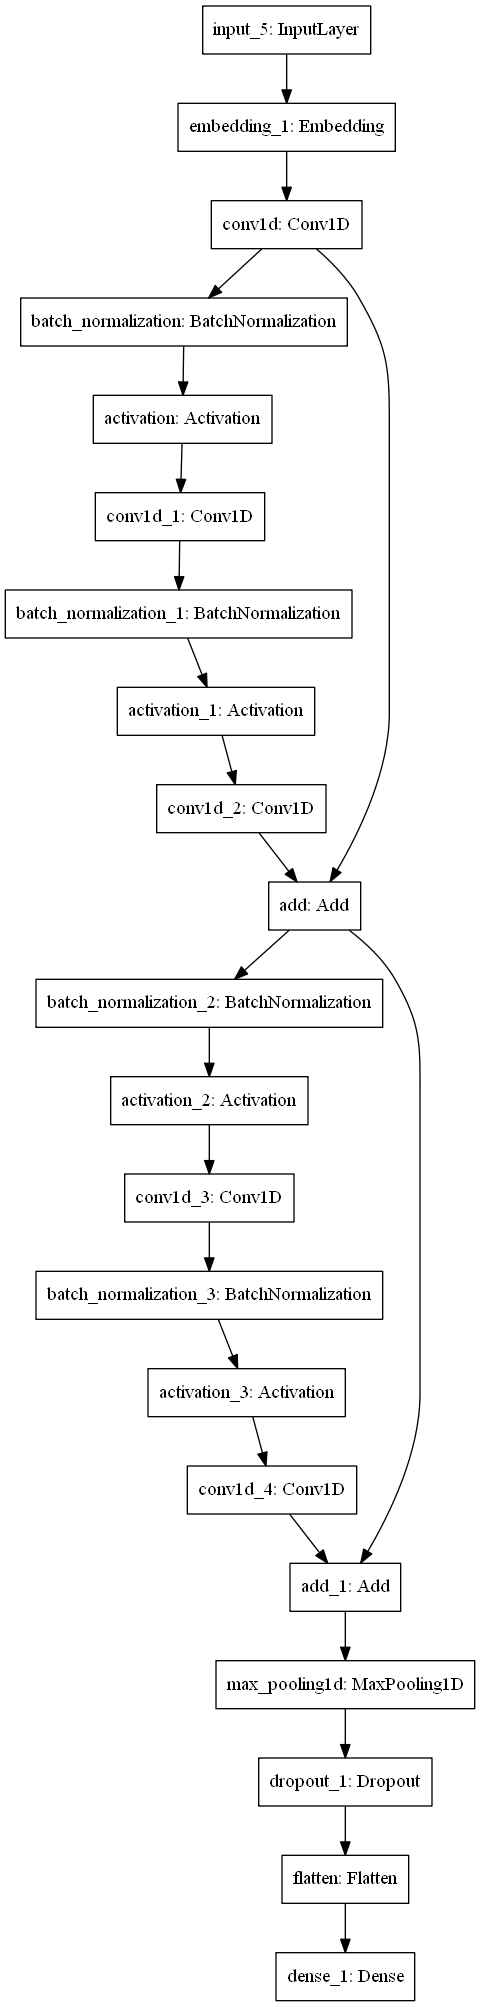

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='model.png')

In [8]:
from tensorflow.keras.layers import Conv1D,Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback
from time import time

loss_callback1 = ModelCheckpoint('F:\\LTD_SEQ\\ModelRESNET_loss.hdf5', monitor='loss', verbose=0, save_best_only=True, mode='auto')
acc_callback1 = ModelCheckpoint('F:\\LTD_SEQ\\ModelRESNET_accuracy.hdf5', monitor='accuracy', verbose=0, save_best_only=True, mode='auto')
LR1=LRTensorBoard(log_dir="F:\\LTD_SEQ\\log\\{}".format(time()))

# input
x_input = Input(shape=(20,))
emb = Embedding(64,128, input_length=max_length)(x_input)

conv = Conv1D(128, 1, padding='same')(emb) 

tensorboard= TensorBoard(log_dir="F:\\LTD_SEQ\\log/S{}".format(time()))
# per-residue representation
res1 = residual_block(conv, 128, 2)
res2 = residual_block(res1, 128, 3)

x = MaxPooling1D(3)(res2)
x = Dropout(0.5)(x)

# softmax classifier
x = Flatten()(x)
x_output = Dense(1000, activation='softmax', kernel_regularizer=l2(0.0001))(x)

model2 = Model(inputs=x_input, outputs=x_output)

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy','mse', 'mae', 'mape'])
print(model2.summary())

Tensor("add/Identity:0", shape=(None, 20, 128), dtype=float32)
Tensor("add_1/Identity:0", shape=(None, 20, 128), dtype=float32)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 20, 128)      8192        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 20, 128)      16512       embedding[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 20, 128)      512         

In [9]:
history2= model2.fit(X_resampled, y_resampled, validation_data=(X_test, y_test), epochs=3, batch_size=1024,verbose=0, callbacks=[TQDMNotebookCallback(),loss_callback1,acc_callback1,LR1])

In [ ]:
from tensorflow.keras.models import load_model
model2.save('F:\\LTD_SEQ\\Model2Save.hdf5')


In [11]:
loaded_model1=load_model('F:\\LTD_SEQ\\Model2Save.hdf5')
print(loaded_model1.summary())
history2= loaded_model1.fit(X_resampled, y_resampled, validation_data=(X_test, y_test), epochs=10, batch_size=1024,verbose=0, callbacks=[TQDMNotebookCallback(),loss_callback1,acc_callback1,LR1])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 20, 128)      8192        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 20, 128)      16512       embedding[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 20, 128)      512         conv1d[0][0]                     
______________________________________________________________________________________________

In [13]:
from tensorflow.keras.models import load_model
model2.save('F:\\LTD_SEQ\\Model2Save.hdf5')
loaded_model=load_model('F:\\LTD_SEQ\\Model2Save.hdf5')
print(loaded_model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 20, 128)      8192        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 20, 128)      16512       embedding[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 20, 128)      512         conv1d[0][0]                     
______________________________________________________________________________________________

In [16]:
X_train[:1001]
y_train[:1001]
y_pred=loaded_model.predict(X_resampled[:100001])

In [17]:
score=loaded_model.evaluate(X_train[:1001],y_train[:1001],batch_size=32)
import numpy as np
y_pred_bool = np.argmax(y_pred, axis=1)
y_pred_bool[:1000]
from sklearn.metrics import classification_report
print(classification_report(y_resampled[:100001], y_pred_bool))

1001/1 [] - 0s 371us/sample - loss: 0.8815 - accuracy: 0.8412 - mse: 3.8547 - mae: 1.9351 - mape: 25072.5762
              precision    recall  f1-score   support

           0       0.08      0.13      0.10      3721
           1       0.03      0.09      0.04      1869
           2       0.95      0.89      0.92     94411

    accuracy                           0.85    100001
   macro avg       0.35      0.37      0.35    100001
weighted avg       0.90      0.85      0.87    100001



In [23]:
y_pred=loaded_model.predict(X_resampled[:1000001])
score=loaded_model.evaluate(X_train[:10001],y_train[:10001],batch_size=32)
import numpy as np
y_pred_bool = np.argmax(y_pred, axis=1)
y_pred_bool[:1000001]
from sklearn.metrics import classification_report
print(classification_report(y_resampled[:1000001], y_pred_bool))

10001/1 [] - 3s 346us/sample - loss: 0.8274 - accuracy: 0.8414 - mse: 3.7892 - mae: 1.9054 - mape: 36892.6367
              precision    recall  f1-score   support

           0       0.09      0.14      0.11     36568
           1       0.03      0.08      0.04     18209
           2       0.95      0.89      0.92    945224

    accuracy                           0.85   1000001
   macro avg       0.35      0.37      0.35   1000001
weighted avg       0.90      0.85      0.87   1000001



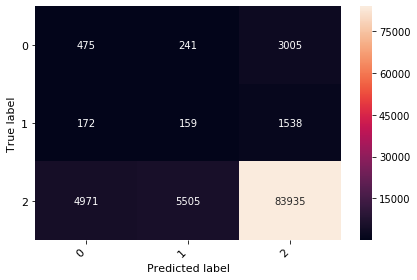

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
confusion_matrix= confusion_matrix(y_resampled[:100001], y_pred_bool)#.argmax(axis=1))
confusion_matrix_df = pd.DataFrame(confusion_matrix)
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 10}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 11)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 11)
plt.ylabel('True label', fontsize = 11)
plt.xlabel('Predicted label', fontsize = 11)
plt.savefig('C:\\users\\subasri\\desktop\\LSTM_Multiclassfication.png')
plt.tight_layout()